# Foundations of Machine Learning Models

## Multiple Linear Regression

#### Name: Zachary W, Noah P, Landon S

MessageError: Error: credential propagation was unsuccessful

### Details
The purpose of this assignment is to hone your Python skills, and expose you to an elementary 3D linear regression problem.

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="/content/LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="/content/LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [ ]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize= 14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

cmap = mpl.colormaps.get_cmap("jet")

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

We begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [ ]:
import pandas as pd
import csv

fileName = "MultipleLinearRegression.csv"

data = pd.read_csv(fileName) #read data

X = data[['x', 'y']].values.reshape(-1,2)
Y = data['z']

#range for each dimension

x = X[:, 0]
y = X[:, 1]
z = Y

data #this line prints the data

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
...,...,...,...
70,18.068038,16.252976,396.115249
71,2.749494,3.433744,68.351161
72,2.785527,2.817559,58.948555
73,16.147826,16.344096,382.447605


# Create First Image

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

NameError: name 'save_fig' is not defined

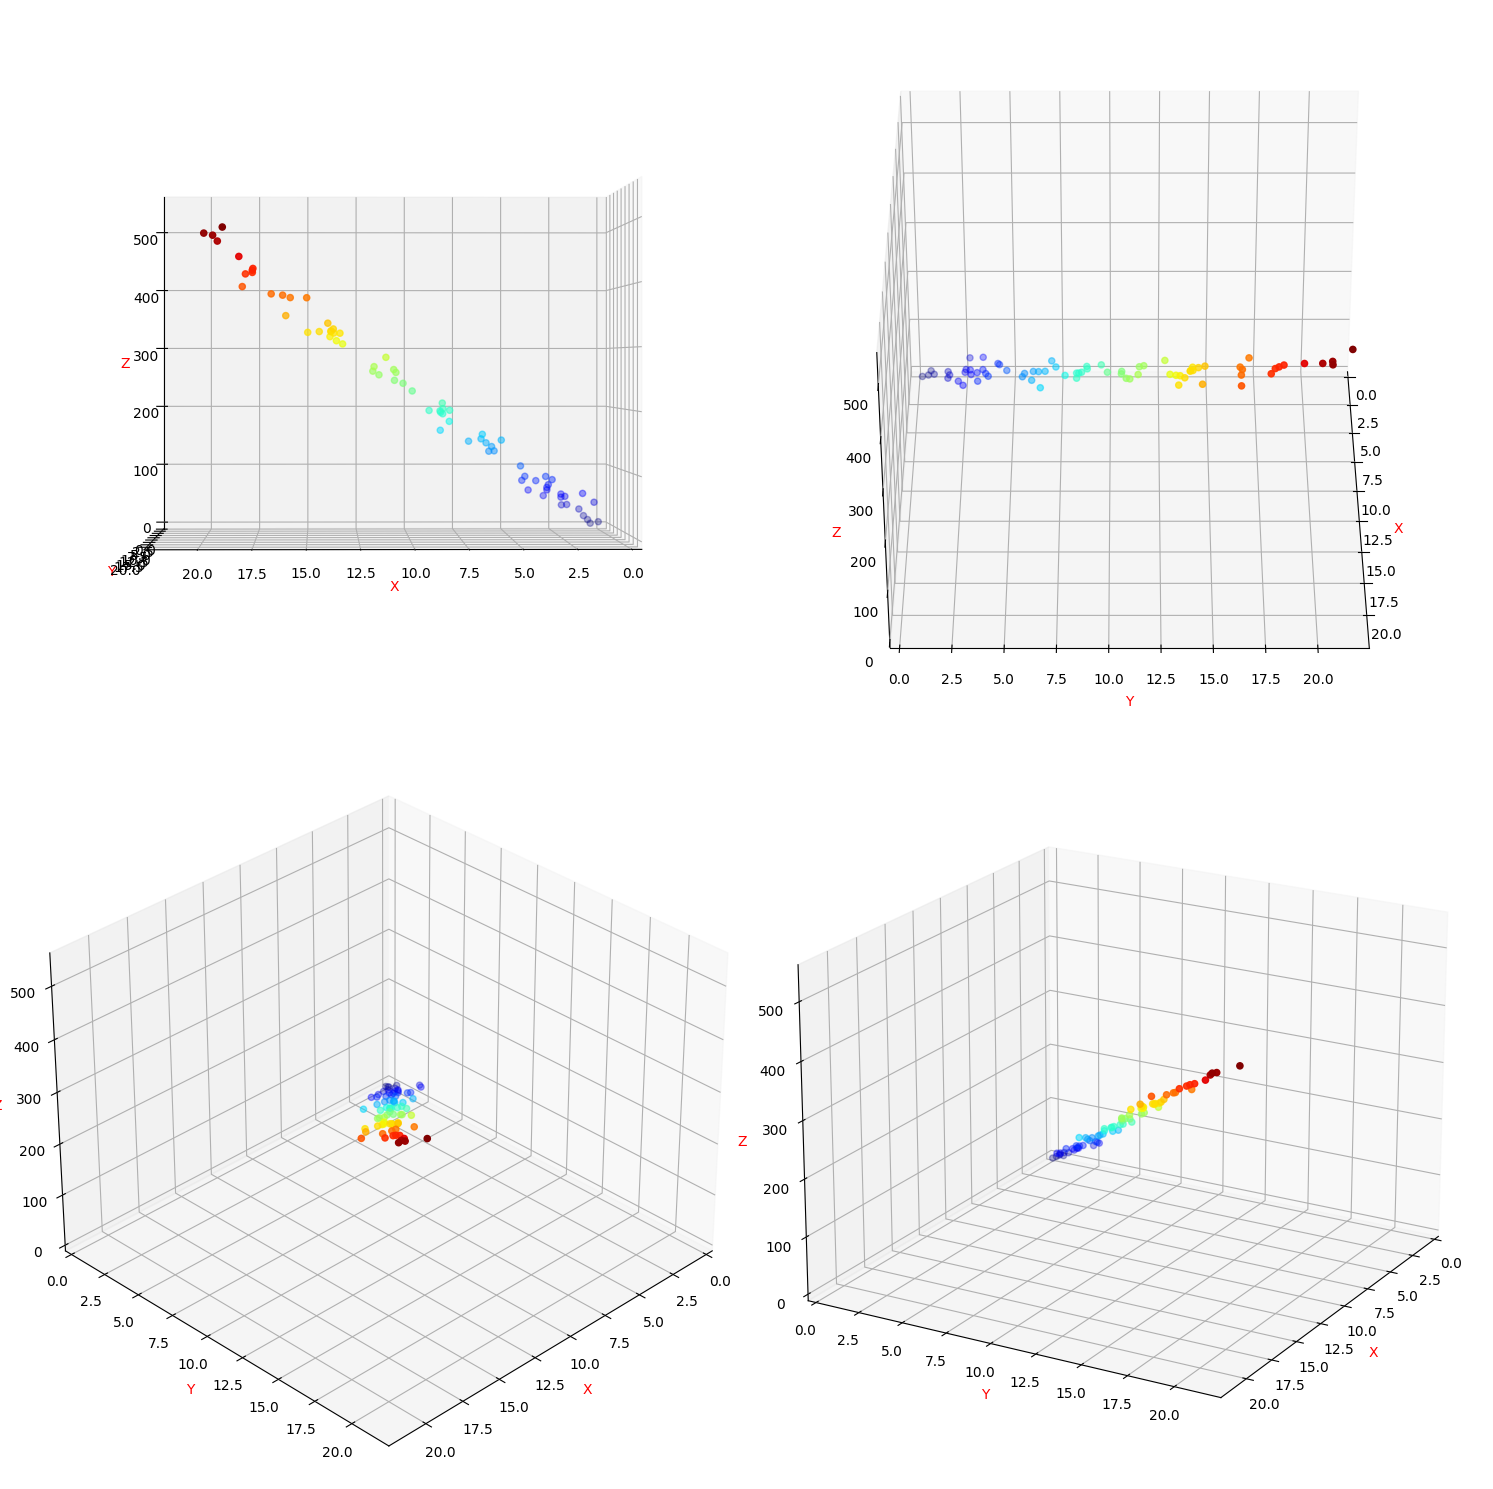

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv

fig = plt.figure(figsize=[15, 15])

# Create a list of subplots
ax1 = fig.add_subplot(221, projection = '3d')
ax2 = fig.add_subplot(222, projection = '3d')
ax3 = fig.add_subplot(223, projection = '3d')
ax4 = fig.add_subplot(224, projection = '3d')
#221 = top left 222 = top right 223 = bottom left 224 = bottom = 224

# Loop through each subplot and add points with jet color
ax = [ax1, ax2, ax3, ax4]
for a in ax:
    # Scatter plot with jet color map
    a.scatter3D(x, y, z, c=z, cmap='jet')
    # Add labels with color
    a.set_xlabel('X', color='r')
    a.set_ylabel('Y', color='r')
    a.set_zlabel('Z', color='r')
    a.set_xlim(0,22)
    a.set_ylim(0,22)
    a.set_zlim(0,550)
ax1.view_init(0, 89)
ax2.view_init(35, 0)
ax3.view_init(32, 45)
ax4.view_init(20, 30)

plt.tight_layout()

save_fig("data_scatter")
plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an OBJECT of this CLASS called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response.

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [ ]:
#use LinearRegression in order to create a fit model
#and later on use it to predict

from sklearn.linear_model import LinearRegression

### ENTER CODE HERE ###
# Create linear regression object
model = LinearRegression()
model.fit(X, Y)
print("Coefficients:", model.coef_)
print('Intercepts:', model.intercept_)

Coefficients: [ 8.02602396 15.95639323]
Intercepts: -8.632876775060708


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.  The code has already been written, your task here is to ensure you understand how the above equation becomes the below code.

In [ ]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit

z_fit = model.predict(np.array([x_fit, y_fit]).T) ##must pass both features as Data Frame

z_fit

array([-8.63287678e+00, -8.12874188e+00, -7.62460698e+00, -7.12047209e+00,
       -6.61633719e+00, -6.11220230e+00, -5.60806740e+00, -5.10393250e+00,
       -4.59979761e+00, -4.09566271e+00, -3.59152782e+00, -3.08739292e+00,
       -2.58325802e+00, -2.07912313e+00, -1.57498823e+00, -1.07085334e+00,
       -5.66718440e-01, -6.25835444e-02,  4.41551352e-01,  9.45686247e-01,
        1.44982114e+00,  1.95395604e+00,  2.45809094e+00,  2.96222583e+00,
        3.46636073e+00,  3.97049562e+00,  4.47463052e+00,  4.97876541e+00,
        5.48290031e+00,  5.98703521e+00,  6.49117010e+00,  6.99530500e+00,
        7.49943989e+00,  8.00357479e+00,  8.50770969e+00,  9.01184458e+00,
        9.51597948e+00,  1.00201144e+01,  1.05242493e+01,  1.10283842e+01,
        1.15325191e+01,  1.20366540e+01,  1.25407889e+01,  1.30449237e+01,
        1.35490586e+01,  1.40531935e+01,  1.45573284e+01,  1.50614633e+01,
        1.55655982e+01,  1.60697331e+01,  1.65738680e+01,  1.70780029e+01,
        1.75821378e+01,  

Recreate the first image, but plot the line of best fit in each of the subplots as well.

NameError: name 'save_fig' is not defined

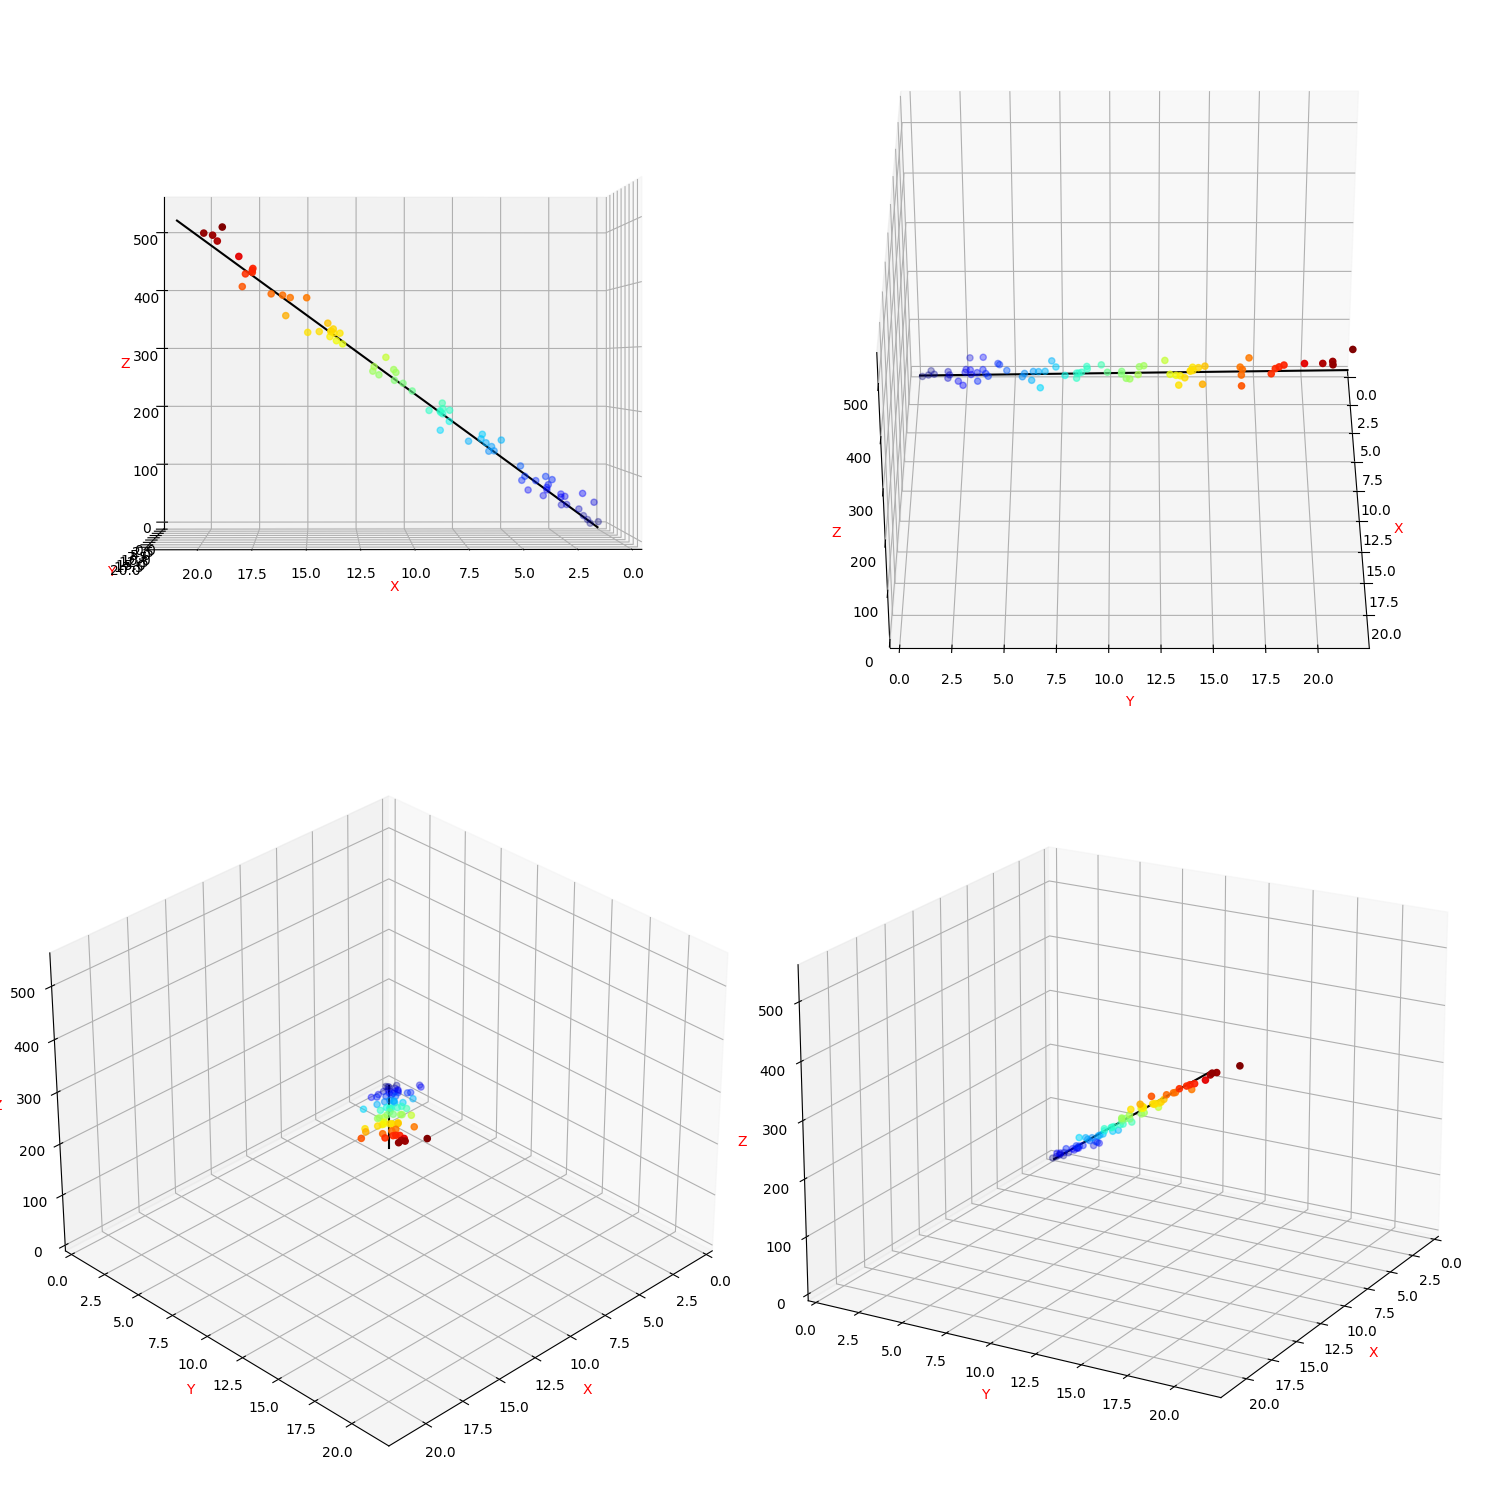

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv

fig = plt.figure(figsize=[15, 15])

# Create a list of subplots
ax1 = fig.add_subplot(221, projection = '3d')
ax2 = fig.add_subplot(222, projection = '3d')
ax3 = fig.add_subplot(223, projection = '3d')
ax4 = fig.add_subplot(224, projection = '3d')
#221 = top left 222 = top right 223 = bottom left 224 = bottom = 224

# Loop through each subplot and add points with jet color
ax = [ax1, ax2, ax3, ax4]
for a in ax:
    # Scatter plot with jet color map
    a.scatter3D(x, y, z, c=z, cmap='jet')
    a.plot(x_fit, y_fit, z_fit, color='black')
    # Add labels with color
    a.set_xlabel('X', color='r')
    a.set_ylabel('Y', color='r')
    a.set_zlabel('Z', color='r')
    a.set_xlim(0,22)
    a.set_ylim(0,22)
    a.set_zlim(0,550)
ax1.view_init(0, 89)
ax2.view_init(35, 0)
ax3.view_init(32, 45)
ax4.view_init(20, 30)

plt.tight_layout()

save_fig("data_scatter")
plt.show()

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters.

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" the Train Linear Regression Model values into the below print statements.

In [ ]:
print("True Model Coefficients: ", "[8, 15]")
print("True Model Intercept : ", "-9")